In [95]:
#Part 1 - Processing and cleaning the data

In [96]:
import pandas as pd

In [97]:
import re

In [98]:
DATASET = pd.read_csv('/content/dane3.csv')

In [99]:
df = DATASET.copy()

In [100]:
#Replace abbreviated weekday names with english equivalents (full weekday names) - created_at column

In [102]:
weekdays = {
    'Mon': 'Monday',
    'Tue': 'Tuesday',
    'Wed': 'Wednesday',
    'Thu': 'Thursday',
    'Fri': 'Friday',
    'Sat': 'Saturday',
    'Sun': 'Sunday'
    }

In [103]:
def replace_abbreviations(tekst):
    for abbreviation, full_name in weekdays.items():
        tekst = tekst.replace(abbreviation, full_name)
    return tekst

In [104]:
df['created_at'] = df['created_at'].apply(replace_abbreviations)

In [105]:
#Replace abbreviated month names with numerical equivalents (e.g. Jun to 06) - user_created_at column

In [106]:
months = {
    'Jan': '01',
    'Feb': '02',
    'Mar': '03',
    'Apr': '04',
    'May': '05',
    'Jun': '06',
    'Jul': '07',
    'Aug': '08',
    'Sep': '09',
    'Oct': '10',
    'Nov': '11',
    'Dec': '12'
    }

In [107]:
def replace_months(tekst):
    for month, month_num in months.items():
        tekst = tekst.replace(month, month_num)
    return tekst

In [108]:
df['created_at'] = df['created_at'].apply(replace_months)

In [ ]:
#Get all links to tweets and pass them to the list

In [109]:
twitter_urls = df['tweet_url'].tolist()
print(twitter_urls)

['https://twitter.com/NieOddac/status/1411957559712432128', 'https://twitter.com/MeteoprognozaPL/status/1411963424221941763', 'https://twitter.com/jolaiza29/status/1412031023588708352', 'https://twitter.com/PogodaMeteo/status/1411936323779371013', 'https://twitter.com/WESLEYROBERTART/status/1412006678275448834', 'https://twitter.com/SDGsbot/status/1411946061564985349', 'https://twitter.com/iSokolkaeu/status/1411964452921122816', 'https://twitter.com/Squabercom/status/1412024990497656836', 'https://twitter.com/SolskaAda/status/1411970011992891394', 'https://twitter.com/PogodaMeteo/status/1411996139604357122', 'https://twitter.com/TestateTornado/status/1411993985946734595', 'https://twitter.com/PerfectDilemma2/status/1412029598758588419', 'https://twitter.com/tytus_de_zoo_/status/1412035207608348675', 'https://twitter.com/PogodaMeteo/status/1411968124627324930', 'https://twitter.com/TerazSrodowisko/status/1411976056249237505', 'https://twitter.com/RafalDudkiewic1/status/14120316949374648

In [17]:
#Get all links found in tweets and pass them to the list (urls column)

In [110]:
def extract_links_from_text(tweet_text):
    links = re.findall(r'(https?://\S+)', tweet_text)
    return links if links else None

In [111]:
df['urls'] = df['text'].apply(extract_links_from_text)

In [20]:
#Get all image links and pass them to the list (media column)

In [112]:
def extract_images_from_text(text):
    images = re.findall(r'(https?://\S+/photo/\S+)', text)
    return images if images else None

In [113]:
df['media'] = df['text'].apply(extract_images_from_text)

In [6]:
#Remove all words marked as stopwords and pass the cleaned text to a new column called text_without_stopwords.

In [114]:
!pip install stopwords

In [115]:
from stopwords import get_stopwords

In [116]:
stop_words = set(get_stopwords('pl'))

In [117]:
def remove_stopwords(text):
    cleaned_text = ' '.join([word for word in text.split() if word.lower() not in stop_words])
    return cleaned_text

In [118]:
df['text_without_stopwords'] = df['text'].apply(remove_stopwords)

In [119]:
df

,coordinates,created_at,hashtags,media,urls,favorite_count,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,...,user_friends_count,user_listed_count,user_location,user_name,user_screen_name,user_statuses_count,user_time_zone,user_urls,user_verified,text_without_stopwords
0,NaN,Monday 07 05 07:58:09 +0000 2021,NaN,None,None,1,1411957559712432128,ciahol,1.411813e+18,1.313318e+09,...,5053,9,Jastrzębie Zdrój woj śląskie,Malina Wąsowska,NieOddac,24391,NaN,https://tumalina.pl/,False,@ciahol @Robert06270082 @Renata_Grochal @MacBo...
1,NaN,Monday 07 05 08:21:28 +0000 2021,NaN,None,None,0,1411963424221941763,RyszardWojcik,1.411944e+18,5.448980e+08,...,1480,182,Polska,meteoprognoza.pl🇵🇱,MeteoprognozaPL,200993,NaN,http://www.meteoprognoza.pl,False,@RyszardWojcik @Roberte36015396 @SzczesniakA @...
2,NaN,Monday 07 05 12:50:04 +0000 2021,NaN,None,None,1,1412031023588708352,Kwiatkow_Lipska,1.412019e+18,1.270771e+18,...,1861,9,NaN,Jola.Iza Lubelanka z Podkarpacia # Unia to My 🇪🇺,jolaiza29,24775,NaN,NaN,False,@Kwiatkow_Lipska @krybarczyk23 @PL_2050 @szymo...
3,NaN,Monday 07 05 06:33:46 +0000 2021,opad Polska pogoda klimat,None,[https://t.co/xsyokVwH5B],5,1411936323779371013,NaN,NaN,NaN,...,364,49,Polska,Meteomodel ❄️ ❄️ ❄️,PogodaMeteo,70608,NaN,https://meteomodel.pl/,False,AutoTweet: Dobowa suma #opad w #Polska w dniu ...
4,NaN,Monday 07 05 11:13:20 +0000 2021,NaN,None,None,0,1412006678275448834,Energetyka_24,1.412006e+18,3.821303e+09,...,936,20,opolskie,WIESLAW ROBERT ROK,WESLEYROBERTART,54644,NaN,http://www.opolskie.upr.org.pl,False,@Energetyka_24 Człowiek gigantyczny wpływ środ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1945,NaN,Wednesday 06 30 08:10:33 +0000 2021,fitczerwiec fitlipiec,None,[https://t.co/ipaIPVU41l],23,1410148739109601281,NaN,NaN,NaN,...,253,0,she/her !!!,𝘢𝘷𝘰𝘬𝘢𝘥𝘰✨,healthy_bubble_,1044,NaN,https://sunflowergirl01.carrd.co/,False,"śniadanie tost francuski i czarna kawa, zjedzo..."
1946,NaN,Wednesday 06 30 08:33:10 +0000 2021,NaN,None,[https://t.co/WHo1xXGM6P],0,1410154429383417859,NaN,NaN,NaN,...,899,42,Poland,Extinction Rebellion Polska,XRPolska,5733,NaN,http://xr.org.pl/,False,W Kanadzie było wczoraj gorąco. Prawie 48°C. d...
1947,NaN,Wednesday 06 30 07:17:38 +0000 2021,NaN,None,None,0,1410135423813308416,NaN,NaN,NaN,...,828,69,Warsaw,Agnes Saoirse Byrne,MeSaoirse,256513,NaN,http://www.instagram.com/mesaoirse/,False,moment nawet Terlecki mówi w PiS klimat opuszc...
1948,NaN,Wednesday 06 30 09:37:47 +0000 2021,klimat metan alternatywnezrodlaenergii geologia,None,[https://t.co/YAE5rR6Y7U],0,1410170690989400070,NaN,NaN,NaN,...,702,135,Polska,Nauka w Polsce,naukawpolsce,5670,NaN,http://naukawpolsce.pap.pl,False,"Hydraty metanu alternatywne źródło energii, al..."


In [120]:
#Part 2 - Exploratory data analysis -- UŻYJ SQL

In [121]:
#List the top 5 tweets with the highest number of likes.

In [122]:
import sqlite3

In [123]:
df = pd.read_csv('dane3.csv')

In [124]:
conn = sqlite3.connect('dane3.db')
cursor = conn.cursor()

In [125]:
df.to_sql('dane3', conn, if_exists='replace', index=False)

1950

In [126]:
cursor.execute("SELECT id, text, favorite_count FROM df ORDER BY favorite_count DESC LIMIT 5")
print(cursor.fetchall())

[(1411005965428789252, 'Imagine pójść na pierwsza randkę z dziewczyna na jakiś wiejski festyn. Czujesz ten klimat? Dmuchane zamki, pełno emerytów, polskie hity lat 90, zapach wiejskiego gowna i najtańszy browar na łące', 5634), (1411193596347310089, 'Kalifornia kroliczkiem katastrofy klimatyzmu. Nawet Bloomberg przyznaje, że szaleńczy pęd do zielonej energii doprowadził do masowych wylączeń i awarii Klimatyści swoje, że to klimat,  ale jakoś dziwnie klimat nie powoduje wylączeń w sąsiednich stanach. https://t.co/fcQgFatabz', 467), (1411731136833888259, '@yahabibtii Pracuje w kawiarni i nieraz jacyś stali klienci przychodzili z laptopem pracować itd, mówili że po prostu u nas w kawiarni jest fajny klimat, że dobrze im się tu pracuje, z resztą też taka osoba zawsze bierze kawę i coś do jedzenia więc myślę że spoko opcja tak raz na jakiś czas', 215), (1411273519875465216, 'Ciekawe, czy upały i pożary w chłodnej Kanadzie, przekonają niektórych, że trzeba chronić klimat?\n\n#kryzysklimatycz

In [127]:
#List the top 5 tweets with the highest number of retweets.
cursor.execute("SELECT id, text, retweet_count FROM df ORDER BY retweet_count DESC LIMIT 5")
print(cursor.fetchall())

[(1411999998091354114, 'Imagine pójść na pierwsza randkę z dziewczyna na jakiś wiejski festyn. Czujesz ten klimat? Dmuchane zamki, pełno emerytów, polskie hity lat 90, zapach wiejskiego gowna i najtańszy browar na łące', 395), (1411794498506702850, 'Imagine pójść na pierwsza randkę z dziewczyna na jakiś wiejski festyn. Czujesz ten klimat? Dmuchane zamki, pełno emerytów, polskie hity lat 90, zapach wiejskiego gowna i najtańszy browar na łące', 395), (1411721715126837251, 'Imagine pójść na pierwsza randkę z dziewczyna na jakiś wiejski festyn. Czujesz ten klimat? Dmuchane zamki, pełno emerytów, polskie hity lat 90, zapach wiejskiego gowna i najtańszy browar na łące', 395), (1411768178322153473, 'Imagine pójść na pierwsza randkę z dziewczyna na jakiś wiejski festyn. Czujesz ten klimat? Dmuchane zamki, pełno emerytów, polskie hity lat 90, zapach wiejskiego gowna i najtańszy browar na łące', 395), (1411733355796783106, 'Imagine pójść na pierwsza randkę z dziewczyna na jakiś wiejski festyn. C

In [140]:
#Show only tweets that are not considered 'sensitive' (possibly_sensitive column).
cursor.execute("SELECT id, text, user_name FROM df WHERE possibly_sensitive = TRUE")
print(cursor.fetchall())

[(1411789162907418625, '@krislem58 Nie jestem fanem, ale czasem lubię ten klimat...\nhttps://t.co/1OAlvcGZKk', 'Krzysztof M. Lemański #PiS get the fuck out !'), (1411346211743748099, 'Czy ptaki wędrowne 🐤pomogą roślinom "uciec" przed ociepleniem?\nWięcej informacji:\n                 👇\nhttps://t.co/LIk8cpnCGU\n                  🐤\n#ptaki #klimat #ocieplenie #bioróżnorodność https://t.co/b19wcxECWw', 'さらどぅ/saradox'), (1411067456630792193, 'Piękny klimat #BELITA https://t.co/DycfsMr627', 'JoliooS'), (1410853496577048578, 'Jak zmieni się klimat? Poor farmer vs.   rich farmer. @EU_Commission @jwojc @Europarl_EN czy #F2F i Green Deal wystarczą na nowe wyzwania? https://t.co/u3ve4cqfTZ', 'Green REV Institute'), (1410841243622555652, 'Nie reklamujmy tego co szkodzi. Zdrowie, klimat, prawa zwierząt. Nie ma definicji zrównoważonej produkcji/ nie finansujmy reklamy mięsa i nabiału https://t.co/mEwB8EaiRp @MarcinUrbaniakk @jwojc #StopEUMeatAds', 'Green REV Institute'), (1410118976471023617, 'Koj

In [141]:
#Show the tweets of the user who created the account earliest (of all users in the dataset) (user_created_at column).
cursor.execute("""
SELECT T1.id, T1.text, T1.user_name
FROM df AS T1
INNER JOIN (
    SELECT user_id, MIN(STRFTIME('%Y-%m-%d %H:%M:%S', user_created_at)) AS earliest_created_at
    FROM df
    GROUP BY user_id
    ORDER BY earliest_created_at
    LIMIT 1
) AS T2 ON T1.user_id = T2.user_id;
""")
print(cursor.fetchall())


[(1411652554799386624, 'Trochę ostrzejszy klimat u nas ale właśnie może czas na zadaszone ścieżki 👇👍 https://t.co/kf1aZSfDqF', 'Czarek Czerwiński 🇵🇱🇺🇦🐈')]


In [142]:
#Show the tweets of the user with the most followers.

cursor.execute("""
SELECT id, text, user_name
FROM df
WHERE user_followers_count = (
    SELECT MAX(user_followers_count)
    FROM df
);
""")
print(cursor.fetchall())

[(1410433382807392260, 'Fala upałów w #Kanada i #USA. Setki ofiar hipertermii #pogoda #klimat \n\nhttps://t.co/dXYmBIkFAt', 'Rzeczpospolita'), (1410190585739284480, '#Banki dopłacą do pieców, jeśli zdecydujemy się na #kredyt \n\nhttps://t.co/LbfRpgsyqS', 'Rzeczpospolita'), (1410074684008378369, '49,5 stopnia Celsjusza w mieście #Kanada. Przed tym tygodniem w Kanadzie nigdy nie zanotowano temperatury wyższej niż 45 stopni Celsjusza #pogoda #klimat \n\nhttps://t.co/1RtJbvnJ5V', 'Rzeczpospolita')]


In [144]:
#Show only verified users (user_verified column).
cursor.execute("""
SELECT user_id, user_name
FROM df
WHERE  user_verified = TRUE
""")
print(cursor.fetchall())

[(1077726788, 'Maciej Lasek'), (104521525, 'Dziennik.pl'), (753647431, 'Jan Mosiński'), (2451775295, 'Witold Zembaczyński🇵🇱'), (96859379, 'Kowal'), (2279602543, 'Katarzyna Lubnauer'), (4187768614, 'Agnieszka Hanajczyk'), (104521525, 'Dziennik.pl'), (2227924555, 'Ministerstwo Klimatu i Środowiska'), (96859379, 'Kowal'), (877868124984442880, 'Ireneusz Zyska'), (362411242, 'Ministerstwo Funduszy i Polityki Regionalnej'), (2227924555, 'Ministerstwo Klimatu i Środowiska'), (96859379, 'Kowal'), (877868124984442880, 'Ireneusz Zyska'), (2227924555, 'Ministerstwo Klimatu i Środowiska'), (2227924555, 'Ministerstwo Klimatu i Środowiska'), (96859379, 'Kowal'), (194399035, 'Rzeczpospolita'), (636914691, 'Grzegorz Nawacki'), (2227924555, 'Ministerstwo Klimatu i Środowiska'), (877868124984442880, 'Ireneusz Zyska'), (2227924555, 'Ministerstwo Klimatu i Środowiska'), (877868124984442880, 'Ireneusz Zyska'), (3004026063, 'Michał Potocki'), (877868124984442880, 'Ireneusz Zyska'), (194399035, 'Rzeczpospoli

In [148]:
#Indicate on which day of the week the tweets in the dataset were most frequently published.

cursor.execute("""
SELECT
    CASE
        WHEN created_at LIKE '%Mon%' THEN 'Mon'
        WHEN created_at LIKE '%Tue%' THEN 'Tue'
        WHEN created_at LIKE '%Wed%' THEN 'Wed'
        WHEN created_at LIKE '%Thu%' THEN 'Thu'
        WHEN created_at LIKE '%Fri%' THEN 'Fri'
        WHEN created_at LIKE '%Sat%' THEN 'Sat'
        WHEN created_at LIKE '%Sun%' THEN 'Sun'
        ELSE 'Unknown'
    END AS day_of_week,
    COUNT(*) AS tweet_count
FROM df
GROUP BY day_of_week
ORDER BY tweet_count DESC
LIMIT 1
""")
print(cursor.fetchall())

[('Sat', 616)]


In [ ]:
#Part 3

In [ ]:
#Extract people (persName) and add them to a column called persons

In [149]:
import spacy

In [152]:
!python -m spacy download pl_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.2/20.2 MB 34.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pl_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [158]:
nlp = spacy.load('pl_core_news_sm')

In [159]:
def extract_person_names(text):
    doc = nlp(text)
    person_names = [ent.text for ent in doc.ents if ent.label_ == "persName"]
    return person_names if person_names else None

df['persName'] = df['text'].apply(extract_person_names)

In [165]:
#Extract places (placeName) and add them to a column called places
def extract_place_names(text):
    doc = nlp(text)
    place_names = [ent.text for ent in doc.ents if ent.label_ == "placeName"]
    return place_names if place_names else None

df['placeName'] = df['text'].apply(extract_place_names)


In [167]:
#Extract organisations (orgName) and place them in the column called organisations
def extract_organisation_names(text):
    doc = nlp(text)
    organisation_names = [ent.text for ent in doc.ents if ent.label_ == "orgName"]
    return organisation_names if organisation_names else None

df['orgNames'] = df['text'].apply( extract_organisation_names)

In [ ]:
#Part 4 - Problem solving/interpreting documentation skills

In [ ]:
#Using the matplotlib package, create a graph showing the number of tweets per day of the week.

In [170]:
import matplotlib.pyplot as plt

In [171]:
df['day_of_week'] = pd.to_datetime(df['created_at']).dt.day_name()
tweet_counts = df['day_of_week'].value_counts()

<ipython-input-171-f1322aa844db>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['day_of_week'] = pd.to_datetime(df['created_at']).dt.day_name() # Extract day name


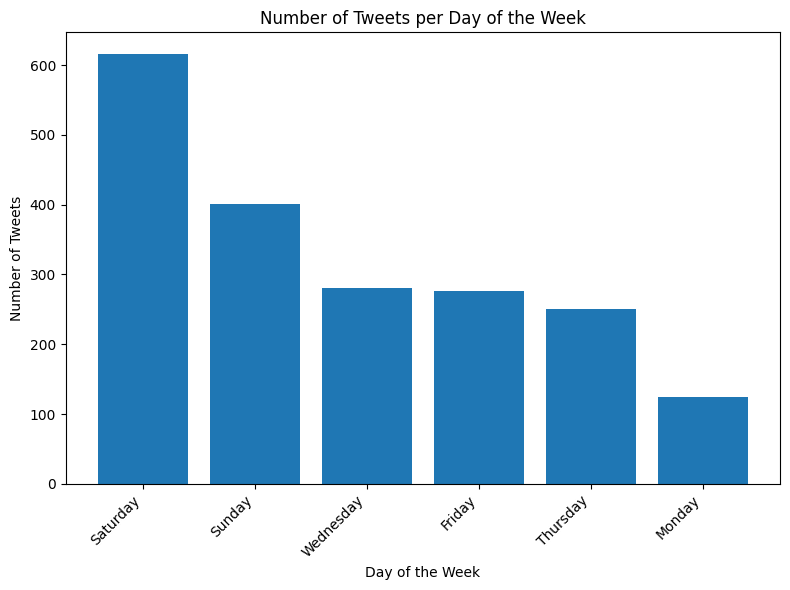

In [172]:
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
plt.bar(tweet_counts.index, tweet_counts.values)
plt.xlabel("Day of the Week")
plt.ylabel("Number of Tweets")
plt.title("Number of Tweets per Day of the Week")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()